In [ ]:
import pandas as pd
import numpy as np

import matplotlib #более популярна
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns #более красивые графики

import warnings #избегаем предупреждений
warnings.filterwarnings("ignore")

## О данных
В ноутбуке используется 3 датасета:
- Данные [Ежегодного доклада о счастье](https://ru.wikipedia.org/wiki/Всемирный_доклад_о_счастье) за 2021 год — это ежегодный доклад, публикуемый подразделением ООН по поиску решений стабильного развития. [Kaggle Source](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv)
- Исторические данные о Всемирном Индексе счастья с 2005 года. [Kaggle Source](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv)
- Данные о населении стран за 2020ый год (полагаем, что за год мало что изменилось, на ковид закроем глаза). [Kaggle Source](https://www.kaggle.com/tanuprabhu/population-by-country-2020?select=population_by_country_2020.csv)


In [ ]:
# загрузка данных
df1 = pd.read_csv('world-happiness-report-2021.csv')
df2 = pd.read_csv('world-happiness-report.csv')
pop = pd.read_csv('population_by_country_2020.csv')

# Переименовать для унификации обращения
df1.rename(columns={'Country name': 'Country'}, inplace=True)
df2.rename(columns={'Country name': 'Country'}, inplace=True)
pop.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)
df1 = df1.set_index(['Country'])
df2 = df2.set_index(['Country'])
pop = pop.set_index(['Country'])

df1.rename(columns={'Ladder score': 'Ladder Score'},
           inplace=True)
df1.rename(columns={'Logged GDP per capita': 'Log GDP per capita'},
           inplace=True)
df2.rename(columns={'Life Ladder': 'Ladder Score'},
           inplace=True)
df2.rename(columns={'Life Ladder': 'Ladder Score'},
           inplace=True)
df2.rename(columns={'Healthy life expectancy at birth': 'Healthy life expectancy'},
           inplace=True)


# добавить в исторические данные регион
df2['Regional indicator'] = "undefined region" # на случай, если страны в датасете с которым слияние, нет.
df2.update(df1[['Regional indicator']])

# страны без региона остались:
# в прошлые годы были страны, которые не попали в репорт 21го года
any(df2['Regional indicator'] == "undefined region") # если True, надо не полениться и самостоятельно дополнить данные

df1 = df1.reset_index(); df2 = df2.reset_index()

In [ ]:
# добавим 2021 год в исторические данные для упрощения своей жизни
df1['year'] = 2021
histor_cols = df1.columns.intersection(df2.columns).tolist()

total_hist_data = pd.DataFrame(columns = histor_cols)
for i in [df1[histor_cols], df2[histor_cols]]:
    total_hist_data = total_hist_data.append(i[histor_cols], ignore_index = 'True')

# сотрём ненужный столбец из данных за 2021 год
df1 = df1.drop(columns=['year'])


# Получим "место в рейтинге" для каждой страны для каждого года
total_hist_data['Rank'] = 0

for year in total_hist_data.year.unique():
    indices = total_hist_data[total_hist_data.year == year].sort_values(by='Ladder Score',
                                                          ascending=True).index
    ranks = sorted([i+1 for i in range(indices.__len__())], reverse=True)
    total_hist_data.loc[indices, ['Rank']] = ranks

# Табличная репрезентация данных

In [ ]:
# Посмотрим на сырой DataFrame
df1

,Country,Regional indicator,Ladder Score,Standard error of ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [ ]:
# Посмотрим на DataFrame, который уже успели немного обработать
total_hist_data

,Country,Regional indicator,Ladder Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Rank
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021,1
1,Denmark,Western Europe,7.62,10.933,0.954,72.7,0.946,0.03,0.179,2021,2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021,3
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.16,0.673,2021,4
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021,5
...,...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,Sub-Saharan Africa,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,2016,132
2094,Zimbabwe,Sub-Saharan Africa,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,2017,139
2095,Zimbabwe,Sub-Saharan Africa,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,2018,135
2096,Zimbabwe,Sub-Saharan Africa,2.694,7.95,0.759,56.2,0.632,-0.064,0.831,2019,143


In [ ]:
total_hist_data.sort_values(by=['year', 'Rank']) # сперва по году, потом по месту
#total_hist_data.sort_values(by=['Rank', 'year']) # сперва по месту, потом по году

,Country,Regional indicator,Ladder Score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Rank
598,Denmark,Western Europe,8.019,10.851,0.972,69.6,0.971,NaN,0.237,2005,1
1360,Netherlands,Western Europe,7.464,10.814,0.947,70.4,0.901,NaN,0.571,2005,2
442,Canada,North America and ANZ,7.418,10.652,0.962,71.3,0.957,0.256,0.503,2005,3
1786,Sweden,Western Europe,7.376,10.739,0.951,71.2,0.964,NaN,NaN,2005,4
215,Australia,North America and ANZ,7.341,10.659,0.968,71.4,0.935,NaN,0.39,2005,5
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.7,0.715,-0.131,0.915,2021,145
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021,146
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.4,0.897,0.061,0.167,2021,147
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.75,56.201,0.677,-0.047,0.821,2021,148


Создание функций для визуализации

In [ ]:
def color_rank(value):
    if value == 1.0:
        color = 'yellow'
    elif value == 2.0:
        color = 'silver'
    elif value == 3.0:
        color = 'moccasin'
    elif np.isnan(value):
        color = 'black'
    elif value == 149:
        color = 'red'
    else:
        color = 'default'
    return 'background-color: %s' % color

def highlight_max(data, color='green'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    data = data.astype(float)
    if data.ndim == 1:
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
# Поиск "счастивейших" в среднем за последние 16 лет людей с помощью табличной репрезентации

table_hist_ranks = total_hist_data.pivot(index='Country', columns='year', values=['Rank'])
table_hist_ranks['AVG'] = table_hist_ranks.mean(axis = 1)
table_hist_ranks = table_hist_ranks.sort_values(by = ['AVG'])
table_hist_ranks['Historical Rank'] = range(1, len(table_hist_ranks)+1)
table_hist_ranks.style.applymap(color_rank,
                                subset = ['Rank', 'Historical Rank']
                               ).format('{:.0f}',
                                        na_rep='-',
                                        subset=['Rank']
                                       )

In [ ]:
# создадим аналогичную таблицу с другими значениями: не местом в году, а с индексом.
table_hist_score = total_hist_data.pivot_table(index='Country',
                                        columns='year',
                                        values=['Ladder Score']
                                       )
table_hist_score = table_hist_score.reset_index()
table_hist_score['AVG'] = table_hist_score.mean(axis = 1)
table_hist_score = table_hist_score.sort_values(by = ['AVG'], ascending = False)

table_hist_score['Historical Rank'] = range(1, len(table_hist_ranks)+1)
table_hist_score = table_hist_score.set_index(['Country', 'Historical Rank'])

table_hist_score.style.apply(highlight_max).format(na_rep='-',
                                                   subset=['Ladder Score']
                                                  )

In [ ]:
df1.describe().T.style\
                        .bar(subset=['mean'],
                            color='cyan')\
                            .background_gradient(subset=['std'], cmap='magma')\
                            .background_gradient(subset=['50%'], cmap='pink')\
                            .background_gradient(subset=['max'], cmap='Pastel1')\

,count,mean,std,min,25%,50%,75%,max
Ladder Score,149.000000,5.532839,1.073924,2.523000,4.852000,5.534000,6.255000,7.842000
Standard error of ladder score,149.000000,0.058752,0.022001,0.026000,0.043000,0.054000,0.070000,0.173000
upperwhisker,149.000000,5.648007,1.054330,2.596000,4.991000,5.625000,6.344000,7.904000
lowerwhisker,149.000000,5.417631,1.094879,2.449000,4.706000,5.413000,6.128000,7.780000
Log GDP per capita,149.000000,9.432208,1.158601,6.635000,8.541000,9.569000,10.421000,11.647000
Social support,149.000000,0.814745,0.114889,0.463000,0.750000,0.832000,0.905000,0.983000
Healthy life expectancy,149.000000,64.992799,6.762043,48.478000,59.802000,66.603000,69.600000,76.953000
Freedom to make life choices,149.000000,0.791597,0.113332,0.382000,0.718000,0.804000,0.877000,0.970000
Generosity,149.000000,-0.015134,0.150657,-0.288000,-0.126000,-0.036000,0.079000,0.542000
Perceptions of corruption,149.000000,0.727450,0.179226,0.082000,0.667000,0.781000,0.845000,0.939000


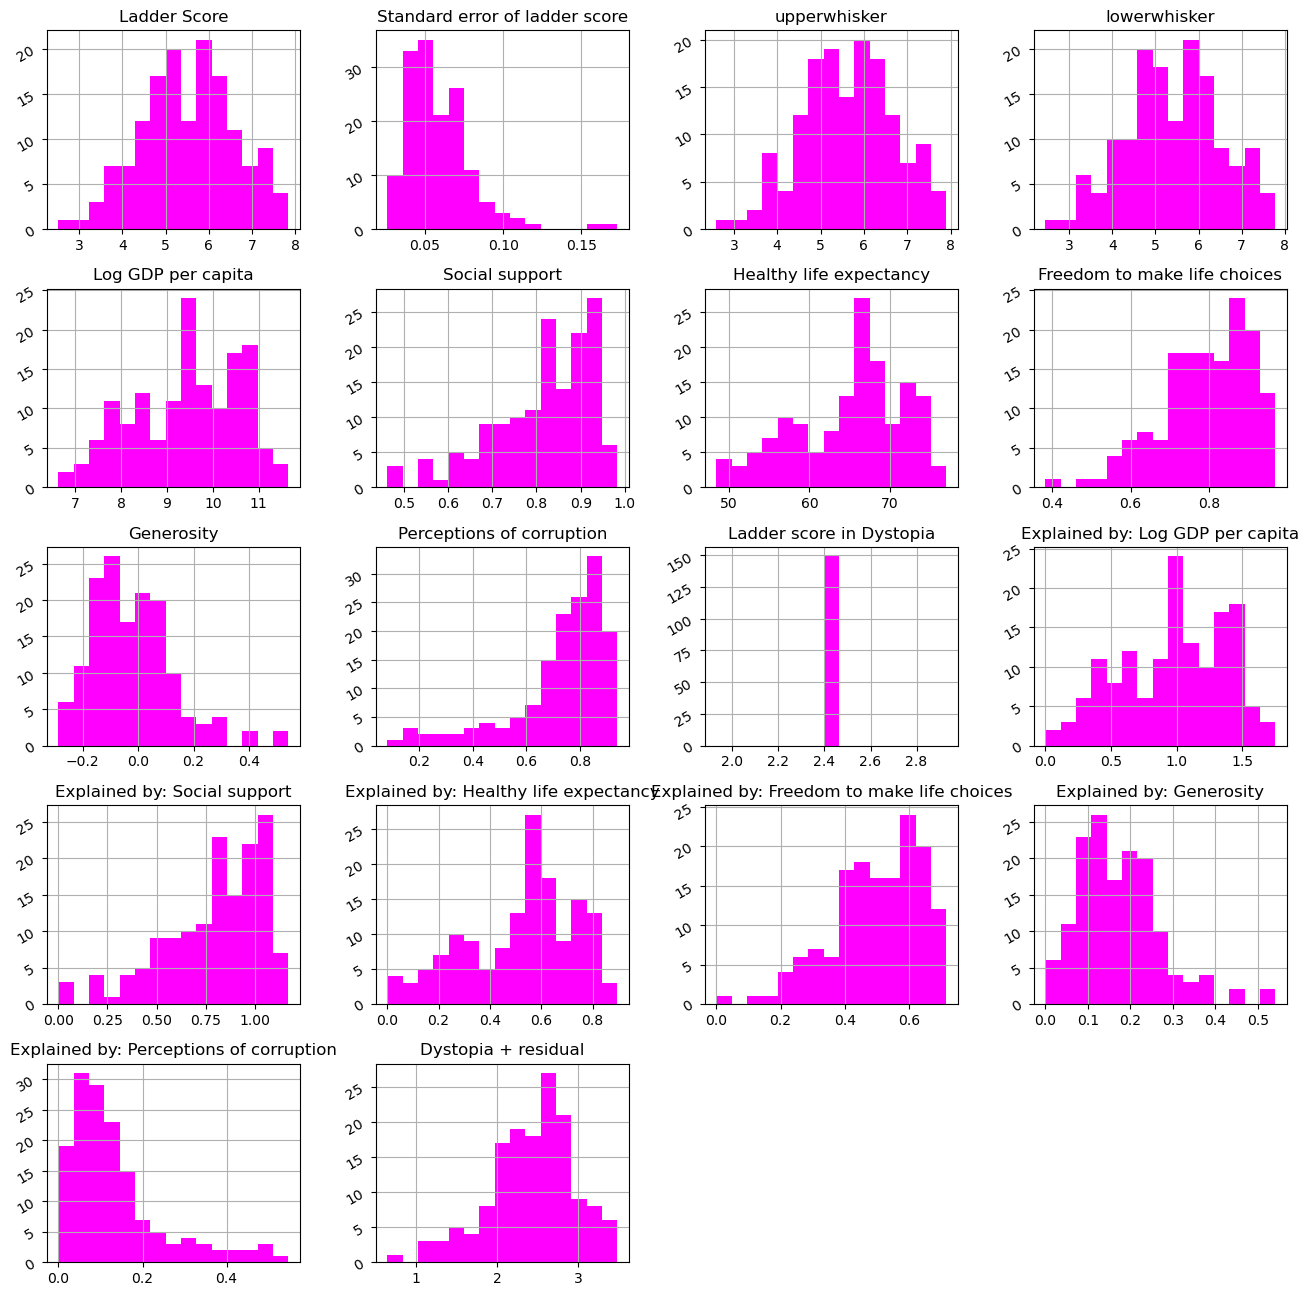

In [ ]:
# Построение гистограм распределения
plt.rcParams['figure.figsize'] = (16,16)

df1[
    ['Country',
     'Regional indicator',
     'Ladder Score',
     'Standard error of ladder score',
     'upperwhisker',
     'lowerwhisker',
     'Log GDP per capita',
     'Social support',
     'Healthy life expectancy',
     'Freedom to make life choices',
     'Generosity',
     'Perceptions of corruption',
     'Ladder score in Dystopia',
     'Explained by: Log GDP per capita',
     'Explained by: Social support',
     'Explained by: Healthy life expectancy',
     'Explained by: Freedom to make life choices',
     'Explained by: Generosity',
     'Explained by: Perceptions of corruption',
     'Dystopia + residual']
].hist(
    color="magenta",
    grid=True,
    legend=False,
    yrot=30,
    bins=15
      );

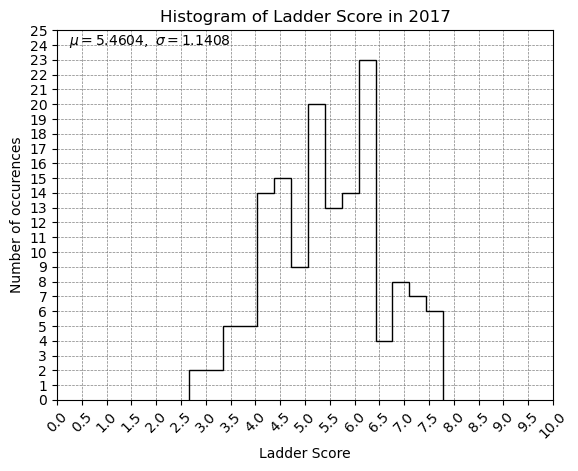

In [ ]:
# возврат дефолтных настроек отображения
plt.style.use('default')

curr_year = 2017
curr_col_name = 'Ladder Score'
dat = total_hist_data[total_hist_data.year == curr_year][curr_col_name]
ax_cap = (10, 25)

fig, ax = plt.subplots()

ax.hist(dat,
        color="black",
        histtype='step',
        bins=15
        )

plt.xlim(0, ax_cap[0]);ax.set_xticks(np.linspace(0,ax_cap[0],2*ax_cap[0]+1))
plt.ylim(0, ax_cap[1]);ax.set_yticks(np.linspace(0,ax_cap[1],ax_cap[1] + 1))

plt.xticks(rotation=45)
plt.grid(color='grey',
         linewidth=0.5,
         linestyle='--')

plt.title('Histogram of {} in {}'.format(curr_col_name, curr_year))
plt.xlabel(curr_col_name)
plt.ylabel('Number of occurences')
plt.text(0.25, 24, '$\mu={:.4f},\ \sigma={:.4f}$'.format(dat.mean(),dat.std()))

plt.show() # в ноутбуках строчка необязательна

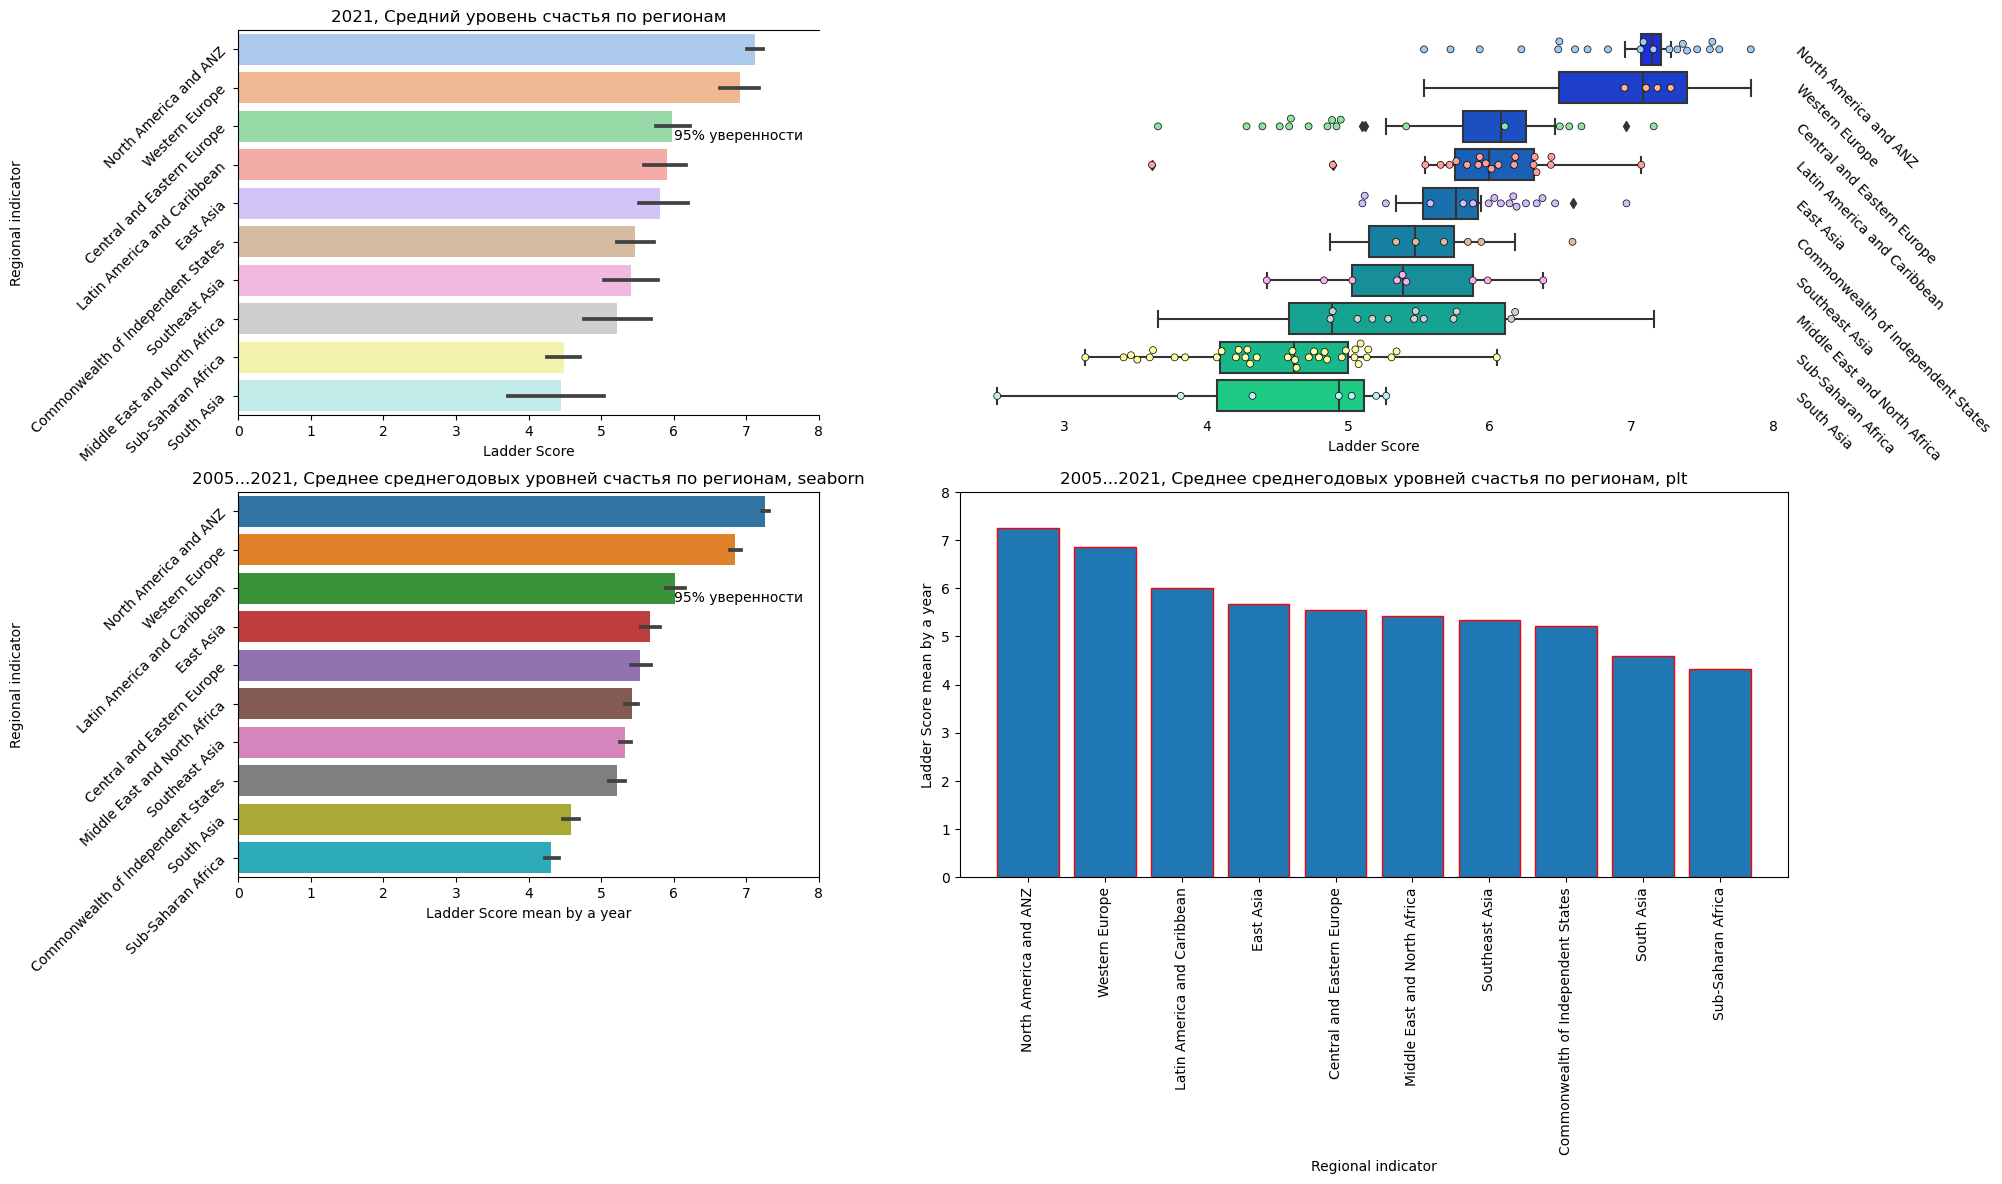

In [ ]:
# Создания частотных гистограм
fig, ax = plt.subplots(ncols=2,
                       nrows=2,
                       figsize=(20, 11),
                       gridspec_kw={'width_ratios': [0.7, 1]}
                      )

mean_ladder_sorted = df1.groupby('Regional indicator').mean()['Ladder Score'].sort_values(ascending=False)
ax[0,0].set_yticklabels(mean_ladder_sorted.index, rotation=45)
ax[0,0].set_title("2021, Средний уровень счастья по регионам")
ax[0,0].set_xlim(0, 8)
ax[0,0].text(6, 2.34, '95% уверенности'.format(1,2))
sns.barplot(y = 'Regional indicator',
            x = 'Ladder Score',
            data = df1,
            order= mean_ladder_sorted.index,
            ax = ax[0,0],
            palette = 'pastel')
# Для разнообразия, уберем границы
ax[0,0].spines['right'].set_visible(False)

# Повторим, но в этот раз - ящики с усами
sns.boxplot(y ='Regional indicator',
            x ='Ladder Score',
            data = df1,
            order= mean_ladder_sorted.index,
            ax = ax[0,1],
            palette = 'winter')
    # Добавим дата-семплы поверх усатого ящика
sns.swarmplot(y = 'Regional indicator',
              x = 'Ladder Score',
              data =df1,
              ec='black',
              linewidth=0.5,
              ax = ax[0,1],
              palette='pastel')
ax[0,1].set_yticklabels(mean_ladder_sorted.index, rotation=315)

# Для разнообразия, уберем границы
for s in ['top','left','bottom','right']:
    ax[0,1].spines[s].set_visible(False)
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylabel("")
ax[0,1].tick_params(axis=u'both', which=u'both',length=0)

,idx = 0
dict_ladders_by_yr = {}
for region in total_hist_data['Regional indicator'].unique():
    for yr in sorted(total_hist_data['year'].unique()):
        dict_ladders_by_yr[idx] = {'Regional indicator' : region,
                                   'year' : yr,
                                   'Ladder Score mean by a year' : total_hist_data[total_hist_data['year'] == yr]\
                                                                      [total_hist_data['Regional indicator'] == region]\
                                                                      ['Ladder Score']\
                                                                   .mean()
                                  }
        idx += 1

df_by_yrs = pd.DataFrame(dict_ladders_by_yr).transpose()
df_by_yrs = df_by_yrs.drop(df_by_yrs[df_by_yrs['Regional indicator'] == 'undefined region'].index)
by_yrs_mean_ladder_sorted = df_by_yrs.groupby('Regional indicator').mean()['Ladder Score mean by a year'].sort_values(ascending=False)

ax[1,0].set_yticklabels(mean_ladder_sorted.index, rotation=45)
ax[1,0].set_title("2005...2021, Среднее среднегодовых уровней счастья по регионам, seaborn")
ax[1,0].set_xlim(0, 8)
ax[1,0].text(6, 2.34, '95% уверенности'.format(1,2))
sns.barplot(y = 'Regional indicator',
            x = 'Ladder Score mean by a year',
            data = df_by_yrs,
            order= by_yrs_mean_ladder_sorted.index,
            ax = ax[1,0])

df_by_yrs = df_by_yrs.set_index('Regional indicator')
mean_mean_dict = {}
for reg in df_by_yrs.index.unique():
    mean_mean_dict[reg] = df_by_yrs[df_by_yrs.index == reg]['Ladder Score mean by a year'].mean()
mean_mean_dict = {k: v for k, v in sorted(mean_mean_dict.items(), key=lambda item: item[1], reverse=True)}

ax[1,1].bar([k for k in mean_mean_dict.keys()],
            [v for v in mean_mean_dict.values()],
            edgecolor='red')
ax[1,1].set_xticklabels([k for k in mean_mean_dict.keys()], rotation=90)
ax[1,1].set_ylim(0, 8)
ax[1,1].set_title("2005...2021, Среднее среднегодовых уровней счастья по регионам, plt")
ax[1,1].set_xlabel("Regional indicator")
ax[1,1].set_ylabel("Ladder Score mean by a year")

plt.show()

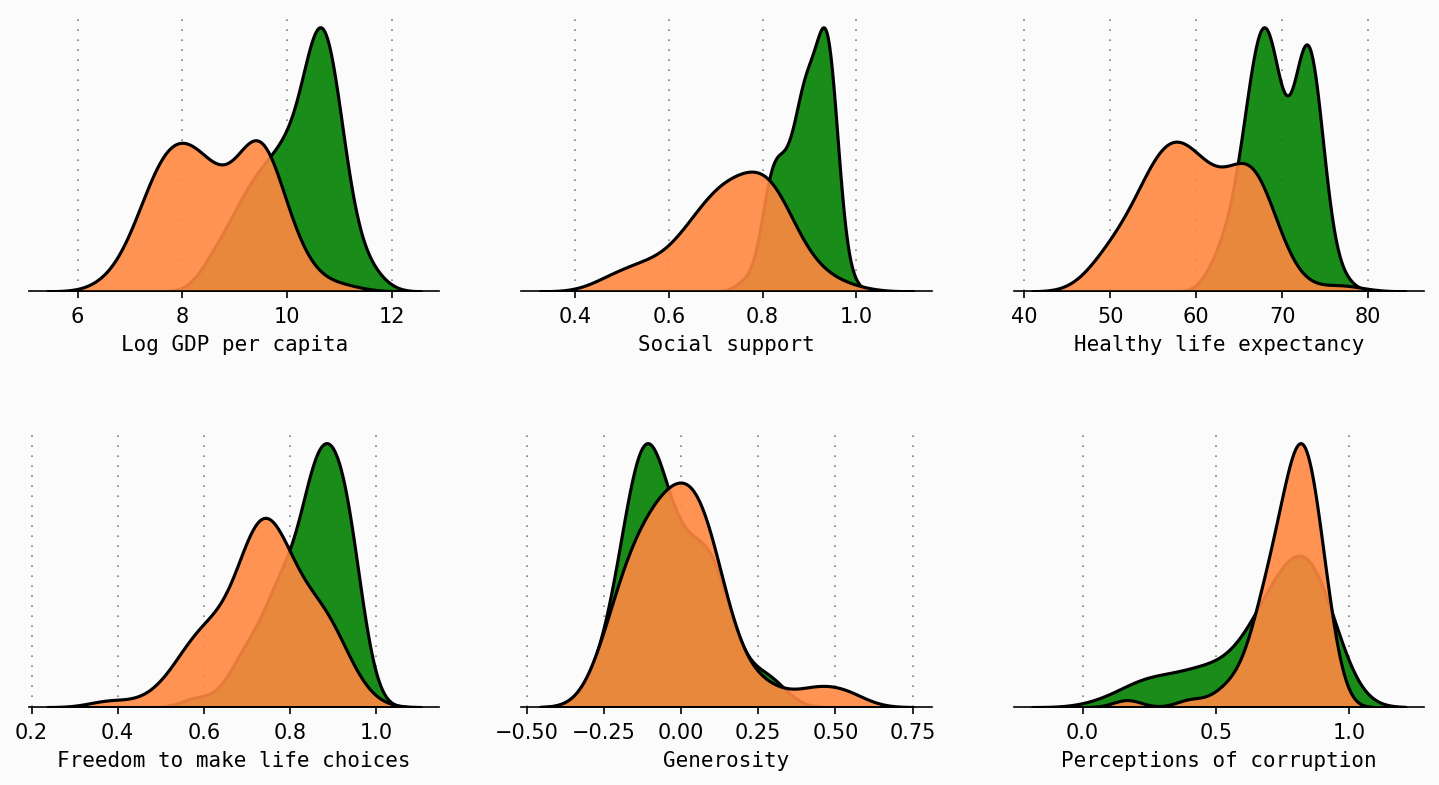

In [ ]:
# Создание диаграммы плотности вероятности при помощи ядерной оценки плотности (KDE)
background_color = '#fbfbfb'
fig = plt.figure(figsize=(12, 6), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.5)


plot = 0
for row in range(0, 2):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

happiness_mean = df1['Ladder Score'].mean()
moddf1 = df1.copy()
moddf1['lower_happy'] = moddf1['Ladder Score'].apply(lambda x: 0 if x < happiness_mean else 1)

Yes = moddf1[moddf1['lower_happy'] == 1]
No = moddf1[moddf1['lower_happy'] == 0]

for param in total_hist_data.columns.tolist()[3:-2]:
        sns.kdeplot(Yes[param], ax=locals()["ax"+str(plot)], color='Green',ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[param],ax=locals()["ax"+str(plot)], color='#ff8841', shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(param, fontfamily='monospace')
        plot += 1

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

"""
There are large differences, with GDP & Social Support being clear\nperhaps more interesting though, unhappy countries appear to be more generous
В счастливых ниже среднего ВВП кажется ниже, социальное обеспечение  - аналогично
Восприятие коррупции мало влияет (мы это видели и на корреляциях
Менее счастливые страны кажутся более "щедрыми"
"""

plt.show()